# **Algoritmos No Supervisados**

[Victor Sanchez](https://github.com/VicoSan07) <br>
Dataset: [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) 

### **Objetivo**

Utilizar y analizar los resultados obtenidos a tráves de distintos algoritmos no supervisados con el fin de agrupar datos, encontrar relaciones entre variables y posiblemente identificar outliers si el método lo permite.

### **Carga de Dataset**

In [1]:
import pandas as pd

#Carga de dataset 'vino rojo' 
dfwiner = pd.read_csv(r'C:/Users/vicos/Documents/winequality-red.csv',delimiter=";",
                      #Tipo de datos en cada columna
                      dtype={
                          'fixed acidity': float,
                          'volatile acidity': float,
                          'citric acid': float,
                          'residual sugar': float,
                          'chlorides': float,
                          'free sulfur dioxide': float,
                          'total sulfur dioxide': float,
                          'density': float,
                          'pH': float,
                          'sulphates': float,
                          'alcohol': float,
                          'quality': int,
                      })

#Carga de dataset 'vino blanco' 
dfwinew = pd.read_csv(r'C:/Users/vicos/Documents/winequality-white.csv',delimiter=";",
                      #Tipo de datos en cada columna
                      dtype={
                          'fixed acidity': float,
                          'volatile acidity': float,
                          'citric acid': float,
                          'residual sugar': float,
                          'chlorides': float,
                          'free sulfur dioxide': float,
                          'total sulfur dioxide': float,
                          'density': float,
                          'pH': float,
                          'sulphates': float,
                          'alcohol': float,
                          'quality': int,
                      })

# Crear columnas con string constante en cada fila
dfwiner['type']='red'
dfwinew['type']='white'

dfwineall = pd.concat([dfwiner,dfwinew],ignore_index=True)
dfwineall = dfwineall.drop(columns=["type"])

# Renombramos los nombres de las variables para facilitar su representación visual
dfwineall.rename(
    columns={"fixed acidity": "FA",
            "volatile acidity": "VA",
             "citric acid": "CA",
             "residual sugar": "RS",
             "chlorides": "CH",
             "free sulfur dioxide": "FSD",
             "total sulfur dioxide": "TSD",
             "density": "DE",
             "pH": "PH",
             "sulphates": "SU",
             "alcohol": "AL",
             "quality": "QU"},
    inplace=True,
)

dfwineall

,FA,VA,CA,RS,CH,FSD,TSD,DE,PH,SU,AL,QU
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Se puede observar que el rango de datos es muy amplio o pequeño de acuerdo a la variable que estemos manejando, por lo que será necesario escalar los datos con el fin de facilitar el análisis.

In [2]:
from sklearn import preprocessing

# Datos escalados
dfwineall_scaled = preprocessing.StandardScaler().fit_transform(dfwineall)
dfwineall_scaled = pd.DataFrame(dfwineall_scaled) 
dfwineall_scaled = dfwineall_scaled.rename(columns = {0:'FA',1: 'VA', 2:'CA',3:'RS',4:'CH',5:'FSD',6:'TSD',7:'DE',8:'PH',9:'SU',10:'AL',11:'QU'})
dfwineall_scaled

,FA,VA,CA,RS,CH,FSD,TSD,DE,PH,SU,AL,QU
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,0.207999
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,-0.937230
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,0.207999
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,1.353228


### **DBSCAN**

DBSCAN (_Density-based spatial clustering of applications with noise_) es un algoritmo no supervisado que modela clusters con una alta densidad de puntos, para ello se apoya de un _radio epsilon_, el cuál definirá el tamaño de la vecindad alrededor de cada uno de los puntos, y una _cota mínima de puntos_ para cada vecindad. 
Aquellos puntos que dentro de su vecindad contengan esa cantidad mínima de puntos establecida se considerarán **puntos centrales**, mientras que los que no cumplan con la cota pero contengan al menos un punto central en su vecindad son considerados **puntos fronterizos**.

**Notas**: 
- El resto de puntos que no caen dentro de estas dos categorías son considerados ruido u outliers del conjunto de datos. 
- La función de distancia entre puntos es seleccionada por el investigador, en este caso, se tomará la distancia euclideana.

DBSCAN es considerado un algoritmo útil para la detección de outliers. Para ejemplo, revisemos su aplicación para las variables "alcohol" y "quality", teniendo presente que la variable alcohol tuvo un buen desempeño en los [indicadores de selección de características](https://github.com/VicoSan07/AprendizajeAutomatico/blob/main/ActividadyTarea04_AA_2023.ipynb) 

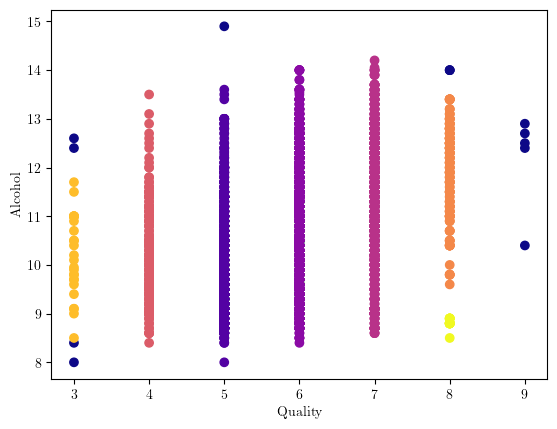

In [10]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X=dfwineall
X_s=dfwineall_scaled

# Seleccionamos las variables Alcohol y Calidad
X1_s = X_s[["AL","QU"]]
X1 = X[["AL","QU"]]

model_dbscan1 = DBSCAN(eps=0.5, min_samples = 5, metric = "euclidean").fit(X1_s)
res_clusters1 = model_dbscan1.fit_predict(X1_s)

from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Grafica
plt.figure()
plt.scatter(X1.values[:, 1], X1.values[:, 0], c=res_clusters1, cmap="plasma")
plt.xlabel("Quality")
plt.ylabel("Alcohol")
#plt.title('DBSCAN Results')
#plt.savefig('dbscan_alqu.png',dpi=400)
plt.show()

In [11]:
import numpy as np 

# Clusters generados
#np.unique(modelo_dbscan1.labels_)
n_clusters1 = len(set(model_dbscan1.labels_)) - (1 if -1 in model_dbscan1.labels_ else 0)
print('Se han generado ',n_clusters1,' clusters')

Se han generado  7  clusters


In [12]:
# Outliers identificados
print('Se han identificado ',len(X1[model_dbscan1.labels_==-1]),' outliers a partir del DBSCAN')

Se han identificado  13  outliers a partir del DBSCAN


Del gráfico anterior, se identifican la existencia de *13 outliers* (identificados en color azul), en base a los parámetros elegidos para el modelo, además se han generado 7 clústers. Para esta primera aplicación se ha decidido seleccionar de forma arbitraria los parámetros, sin embargo, en la practica se recomienda utilizar algún modelo o criterio razonable para su elección

### **Selección de parámetros**

Una manera de seleccionar el valor epsilon del modelo, se da a tráves del uso del método _K-Nearest Neighbors_ (Sharma, 2017), un algoritmo no parametrico cuyo objetivo es encontrar el promedio de distancias para cada punto a sus K vecinos más cercanos, para posteriormente seleccionar la distancia a la que ocurre la curvatura máxima. 

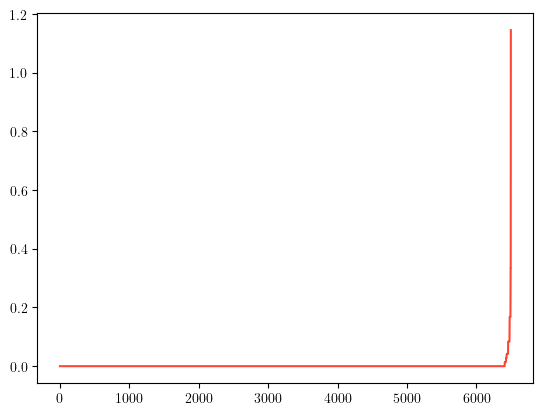

In [13]:
from sklearn.neighbors import NearestNeighbors

# Algoritmo KNN
modelNN1 = NearestNeighbors(n_neighbors=5)
modelNN1.fit(X1_s)
distances, indices = modelNN1.kneighbors(X1_s)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances,color='#FF4633')
plt.show()

Como podemos observar, el épsilon predeterminado se encuentra por debajo de 0.2

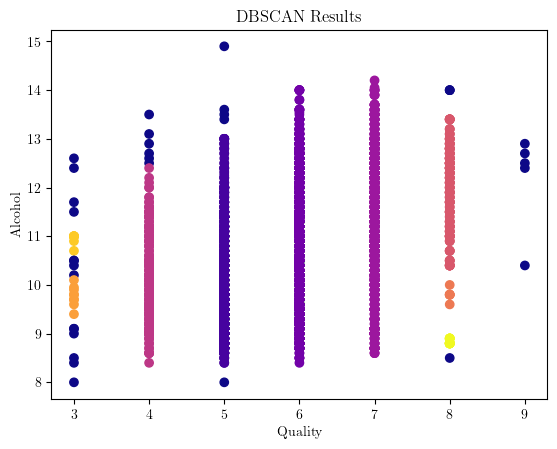

In [14]:
import matplotlib.pyplot as plt
import matplotlib

model_dbscan2 = DBSCAN(eps=0.2, min_samples = 5, metric = "euclidean").fit(X1_s)
res_clusters2 = model_dbscan2.fit_predict(X1_s)

# Grafica
plt.figure()
plt.scatter(X1.values[:, 1], X1.values[:, 0], c=res_clusters2, cmap="plasma")
plt.xlabel("Quality")
plt.ylabel("Alcohol")
plt.title('DBSCAN Results')
plt.show()


In [11]:
# Clusters generados
n_clusters2 = len(set(model_dbscan2.labels_)) - (1 if -1 in model_dbscan2.labels_ else 0)
print('Se han generado ',n_clusters2,' clusters')

Se han generado  9  clusters


In [12]:
# Outliers identificados
print('Se han identificado ',len(X1[model_dbscan2.labels_==-1]),' outliers a partir del DBSCAN')

Se han identificado  34  outliers a partir del DBSCAN


En esta segunda ronda podemos observar que al disminuir el radio de la vecindad, los clusteres han aumentado, así como la cantidad de valores atípicos. En este caso, al ser la calidad una variable discreta, podemos ver que se están generando al menos un clúster por calificación

### **Extensión Completa**

En la sección anterior, se presentó de manera aislada el DBSCAN para las variables alcohol y calidad, con el objetivo de analizar visualmente los clústers, sin embargo, el algoritmo puede ser aplicado al conjunto de datos completo, como se presenta a continuación:

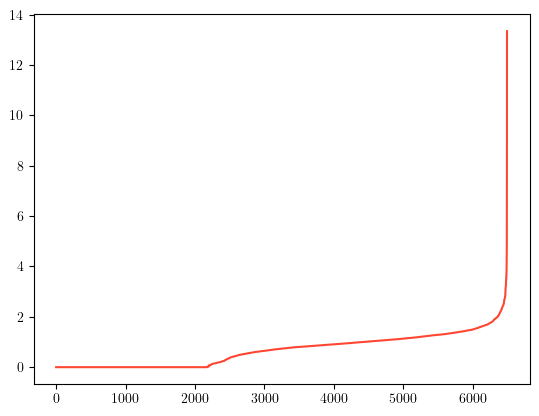

In [15]:
# Algoritmo KNN
modelNNX = NearestNeighbors(n_neighbors=5)
modelNNX.fit(X_s)
distances, indices = modelNNX.kneighbors(X_s)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances,color='#FF4633')
plt.show()

Épsilon entre 2 y 4 de acuerdo al algoritmo KNN, consideremos un valor de 3

In [17]:
# DBSCAN para todo el conjunto
model_dbscanX = DBSCAN(eps=3, min_samples = 5, metric = "euclidean").fit(X_s)

In [18]:
# Clusters generados
n_clustersX = len(set(model_dbscanX.labels_)) - (1 if -1 in model_dbscanX.labels_ else 0)
print('Se han generado ',n_clustersX,' clusters')

Se han generado  2  clusters


In [19]:
# Outliers identificados
print('Se han identificado ',len(X[model_dbscanX.labels_==-1]),' outliers a partir del DBSCAN')

Se han identificado  40  outliers a partir del DBSCAN


El modelo ha formado 2 clústers y ha identificado 40 outliers a partir de un épsilon de 3 y una cantidad mínima de 5 puntos por vecindad. Estos puntos atípicos pueden ser eliminados del total de la muestra como paso previo a probar algoritmos de predicción, tales como regresiones.

### **Uso del DBSCAN bajo un PCA**

PCA (_Principal Component Analysis_) es un método de aprendizaje no supervisado utilizado en espacios de alta dimensión, el cuál busca reducir la complejidad de los datos mientras a su vez conservar la mayor parte de la información. 

Por lo que la pregunta es: ¿Qué resultado tendríamos si utilizamos PCA en los datos y posteriormente aplicamos el algoritmo DBSCAN?

In [20]:
from sklearn.decomposition import PCA

# PCA modelo
modelPCA = PCA(n_components = None)
X_PCA = modelPCA.fit_transform(X_s)
explained_variance = modelPCA.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)

# Varianzas explicadas por componentes
print(cum_explained_variance)

[0.25346226 0.47428343 0.61107566 0.70012777 0.77016947 0.82520274
 0.87218827 0.91518684 0.95338453 0.97830228 0.9972679  1.        ]


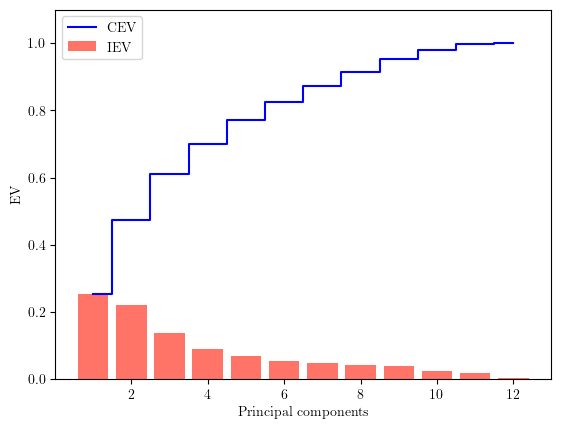

In [22]:
# Gráfico
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.75, align='center',label='IEV',color='#FF4633')
plt.step(range(1, len(explained_variance)+1), cum_explained_variance, where='mid',label='CEV',color='blue')
plt.ylim(0, 1.1)
plt.xlabel('Principal components')
plt.ylabel('EV')
plt.legend(loc='best')
#plt.savefig("PCA_6.png",dpi=200)
plt.show()

Si bien existen varios criterios distintos para seleccionar el número de componentes, hay dos de ellos que son muy populares:

1. Seleccionar el número de componentes mínimo a partir del cual el incremento de la varianza acumulada deja de ser sustancial
2. Tomar los primeros k componentes que capturan al menos el 80% de la suma total de la varianza.

Consideremos 6 componentes con un 82% de la varianza explicada

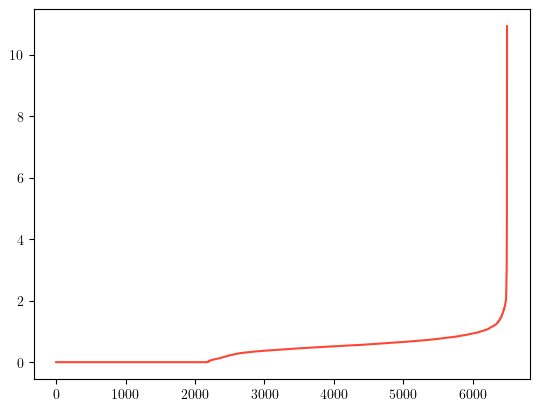

In [23]:
X_PCA = pd.DataFrame(X_PCA)
X_PCA_6 = X_PCA.iloc[:,0:6]

# Algoritmo KNN
modelNNXPCA = NearestNeighbors(n_neighbors=6)
modelNNXPCA.fit(X_PCA_6)
distances, indices = modelNNXPCA.kneighbors(X_PCA_6)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances,color='#FF4633')
plt.show()

In [24]:
# DBSCAN para todo el conjunto
model_dbscanXPCA = DBSCAN(eps=1.5, min_samples = 5, metric = "euclidean").fit(X_PCA_6)

In [25]:
# Clusters generados
n_clustersXPCA = len(set(model_dbscanXPCA.labels_)) - (1 if -1 in model_dbscanXPCA.labels_ else 0)
print('Se han generado ',n_clustersXPCA,' clusters')

Se han generado  2  clusters


In [26]:
# Outliers identificados
print('Se han identificado ',len(X_PCA_6[model_dbscanXPCA.labels_==-1]),' outliers a partir del DBSCAN')

Se han identificado  138  outliers a partir del DBSCAN


Se logró reducir la dimensionalidad de los datos de 12 a 6, y el DBSCAN aplicado a esta nueva dimensionalidad ha generado 2 clústers y 138 outliers, el triple del obtenido bajo el uso del algoritmo para todos los datos originales.

In [27]:
model_dbscanTest2 = DBSCAN(eps=2, min_samples = 5, metric = "euclidean").fit(X_s)
model_dbscanTest25 = DBSCAN(eps=2.5, min_samples = 5, metric = "euclidean").fit(X_s)
model_dbscanTest3 = DBSCAN(eps=3, min_samples = 5, metric = "euclidean").fit(X_s)
model_dbscanTest35 = DBSCAN(eps=3.5, min_samples = 5, metric = "euclidean").fit(X_s)
model_dbscanTest4 = DBSCAN(eps=4, min_samples = 5, metric = "euclidean").fit(X_s)

resp_dbscan = pd.DataFrame({'2.0': [len(set(model_dbscanTest2.labels_)) - (1 if -1 in model_dbscanTest2.labels_ else 0),
                    len(X[model_dbscanTest2.labels_==-1])],
                    '2.5': [len(set(model_dbscanTest25.labels_)) - (1 if -1 in model_dbscanTest25.labels_ else 0),
                    len(X[model_dbscanTest25.labels_==-1])],
                    '3.0':[len(set(model_dbscanTest3.labels_)) - (1 if -1 in model_dbscanTest3.labels_ else 0),
                    len(X[model_dbscanTest3.labels_==-1])],
                    '3.5':[len(set(model_dbscanTest35.labels_)) - (1 if -1 in model_dbscanTest35.labels_ else 0),
                    len(X[model_dbscanTest35.labels_==-1])],
                    '4':[len(set(model_dbscanTest4.labels_)) - (1 if -1 in model_dbscanTest4.labels_ else 0),
                    len(X[model_dbscanTest4.labels_==-1])]  })

resp_dbscan.rename(index= {0:'No. Clústers',1:'No. Outliers'}, inplace=True)

### **Resumen**

In [28]:
resp_dbscan

,2.0,2.5,3.0,3.5,4
No. Clústers,4,2,2,1,1
No. Outliers,245,90,40,19,6


Como se mencionó anteriormente, entre más grande sea el épsilon seleccionado del algoritmo, menor cantidad de clústers y outliers se generarán, al abarcar con dicho radio casi todos los puntos.